<a href="https://colab.research.google.com/github/danielmancovidales/Aplicaciones-en-salud/blob/main/analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Librerias generales
import pandas as pd
import numpy as np
import re
# Librerias e visualización
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Lectura de base de datos filtrado
from google.colab import drive
drive.mount('/content/drive')
df_filtrado= pd.read_csv('/content/drive/MyDrive/analitica3/Salud/df_filtrado.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
pd.set_option('display.max_columns', None)
df_filtrado.head(5
                 )

,Unnamed: 0,year_egreso,mes_egreso,servicio_habilitado,nrodoc,modalidad_contrato,servicio_admite,via_ingreso,unidad_estrategica,tipo_egreso,fecha_ingreso_clinica,transfusion_sangre,antibiotico,alta_medica,posible_alta,dxprincipal_egreso,dx_relacionado1,dx_relacionado2,dx_relacionado3,tipo_diagnostico_principal,dx_principal_egreso_categoria,dx_principal_egreso_capitulo,causa_basica_muerte,causa_basica_categoria,causa_basica_capitulo,profesional_especialidad_grd,tiempo_estancia,year_enfermedad,mes_enfermedad,peso,talla,imc,clasificacion_imc,saturacion_de_oxigeno_(%),perimetro_muslo,perimetro_cintura,pliegue_triceps,pliegue_abdomen,pliegue_muslo,sumatoria_pliegues,presion_arterial_sistolica,presion_arterial_diastolica,frecuencia_cardiaca_en_reposo,auto-calificacion_nivel_de_ejercicio,mets_-indice_metabolico,vo2_-_maxima_cantidad_de_oxigeno,indice_de_fragilidad_groningen,calificacion_(indice_de_fragilidad),tiempo_en_segundos_(apoyo_monopodal),calificacion_(apoyo_monopodal),tiempo_en_segundos_(recorrer_5_metros),velocidad_(m/s),calificacion_velocidad,test_findrisc,indice_tobillo/brazo,diabetes_mellitus,glicemia,hemoglobina_glicada,control_diabetes,tiene_riesgo_de_tener_diabetes_mellitus,tiene_hta,control_hta,tiene_riesgo_de_tener_hta,tiene_epoc,epoc_(clasificacion_bodex),enfermedad_coronaria_(en_el_ultimo_ano),insuficiencia_cardiaca,valvulopatia,arritmia_o_paciente_con_dispositivo,sufre_de_alguna_enfermedad_cardiovascular,tabaquismo,lipoproteina,hdl,colesterol_total,trigliceridos,clasificacion_de_framinghan,creatinina_1_consulta,tasa_de_filtracion_glomerular_tfg,estadio_de_la_enfermedad_renal,microalbuminuria,hormona_estimulante_de_la_tiroides_(tsh),clase_funcional,creatinina_2_consulta,tasa_de_filtracion_glomerular_tfg2,meses_de_diferencia_entre_tfg,cambio_de_tfg,ulcera_de_pie_diabetico,remision,tiene_proximo_control,tipo_control,requiere_cita_de_morbilidad,ambito_segun_el_medico,numero_diagnosticos,mes_activo_programa,year_activo_programa,sexo,primera_clase_funcional,ultima_clase_funcional,ciclo_vital
0,4201,2021,enero,general adultos,309135,pgp,hospitalizacion,remitido,hospitalizacion adultos,Alta Medica,2021-01-01 13:51:11.210,no,no,si,sin informacion,covid-19 virus identificado,infeccion aguda no especificada de las vias re...,insuficiencia respiratoria aguda,enfermedad cardiaca hipertensiva con insuficie...,repetido,uso de emergencia de u07,codigos para propositos especiales,sin informacion en base de datos,sin informacion en base de datos,sin informacion en base de datos,medicina interna,77.719108,2017,Octubre,74.0,154.0,31.20,Obesidad Grasa,97.0,66,99.0,25.0,75.0,60.0,160.0,129,55,71,3,4.0960,14.3360,2.0,fragil,20,Aceptable,5,1.00,Aceptable,Alta Probabilidad de Diabetes,Sin clasificar,Si,0.0,8.91,No controlada,Verificar glicemia o hemoglobina,No,No aplica,Bajo riesgo,No,No aplica,No aplica,No aplica,No,No,No,No,128.34,46.23,213.66,195.45,Alto riesgo,0.78,71.68,Estadio 2,71.10,6.26,Clase funcional 2B,0.00,0.00,0.0,0.00,No,Grupal 2,ND,Sin clasificar,ND,Ambulatorio,0,abril,2017,F,sin clasificar,sin clasificar,vejez
1,4034,2021,enero,urgencias < 24 horas,309838,pgp,urgencias generales piso 1,urgencias,urgencias,fallece,2021-01-01 14:40:33.160,no,si,si,sin informacion,covid-19 virus no identificado,neumonia debida a otros virus,enfermedad pulmonar obstructiva cronica con in...,sindrome de dificultad respiratoria del adulto,nuevo,uso de emergencia de u07,codigos para propositos especiales,enfermedad pulmonar obstructiva cronica con in...,otras enfermedades pulmonares obstructivas cro...,enfermedades del sistema respiratorio,medicina general,8.331622,2018,Octubre,48.0,151.0,21.05,Normal,95.0,34,65.0,5.0,5.0,5.0,15.0,120,70,76,1,4.4115,15.4403,7.0,fragil,0,Malo - Fragil,5,1.00,Aceptable,Baja Probabilidad de Diabetes,0.91 - 1.30 Normal,No,0.0,0.00,No aplica,Sin clasificar,Si,Controlada,No aplica,Sospecha,Sin clasificar,No,Controlada,No,No,No,Si,0.00,44.60,146.00,145.00,Alto riesgo,0.71,48.69,Estadio 3A,0.00,0.00,Clase funcional 4,0.

In [22]:
df_filtrado.columns

Index(['Unnamed: 0', 'year_egreso', 'mes_egreso', 'servicio_habilitado',
       'nrodoc', 'modalidad_contrato', 'servicio_admite', 'via_ingreso',
       'unidad_estrategica', 'tipo_egreso', 'fecha_ingreso_clinica',
       'transfusion_sangre', 'antibiotico', 'alta_medica', 'posible_alta',
       'dxprincipal_egreso', 'dx_relacionado1', 'dx_relacionado2',
       'dx_relacionado3', 'tipo_diagnostico_principal',
       'dx_principal_egreso_categoria', 'dx_principal_egreso_capitulo',
       'causa_basica_muerte', 'causa_basica_categoria',
       'causa_basica_capitulo', 'profesional_especialidad_grd',
       'tiempo_estancia', 'year_enfermedad', 'mes_enfermedad', 'peso', 'talla',
       'imc', 'clasificacion_imc', 'saturacion_de_oxigeno_(%)',
       'perimetro_muslo', 'perimetro_cintura', 'pliegue_triceps',
       'pliegue_abdomen', 'pliegue_muslo', 'sumatoria_pliegues',
       'presion_arterial_sistolica', 'presion_arterial_diastolica',
       'frecuencia_cardiaca_en_reposo', 'auto-califi

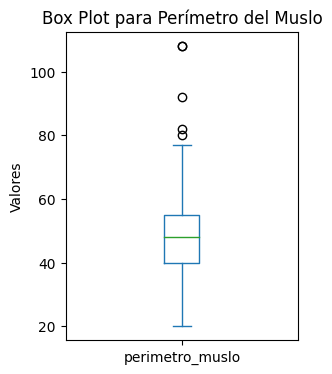

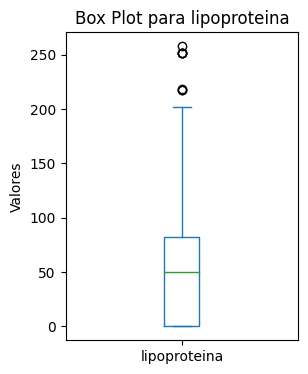

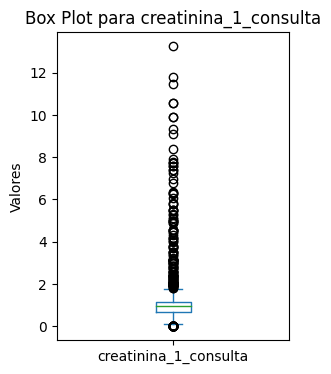

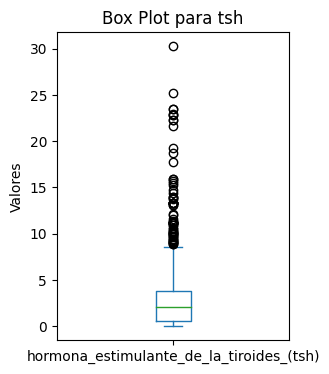

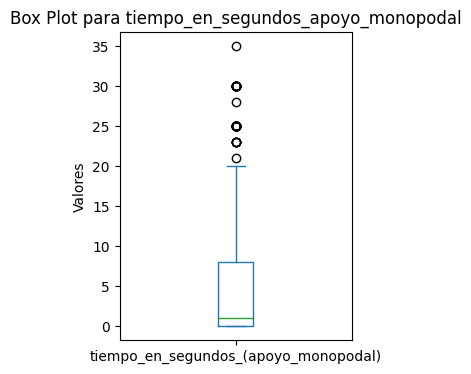

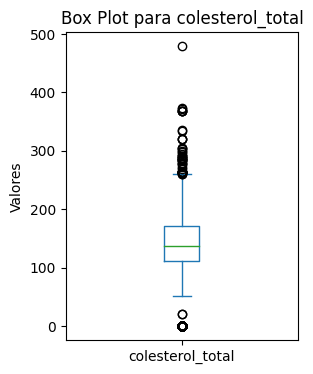

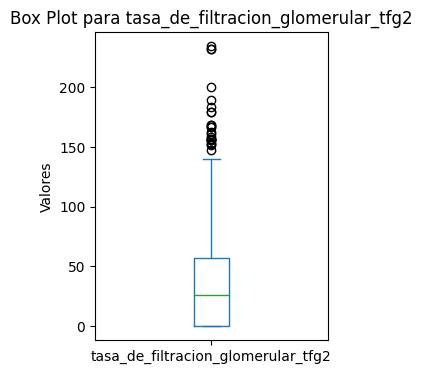

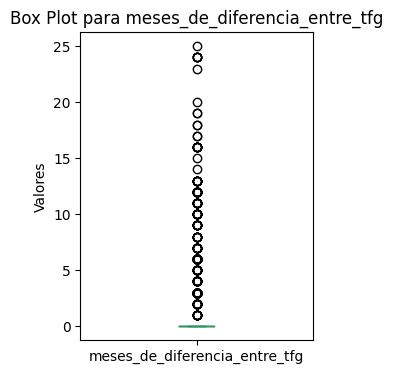

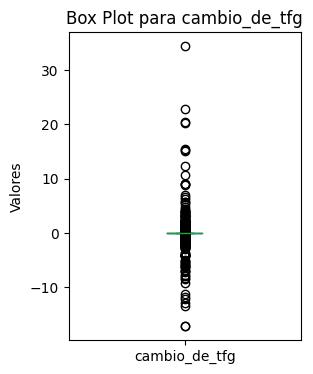

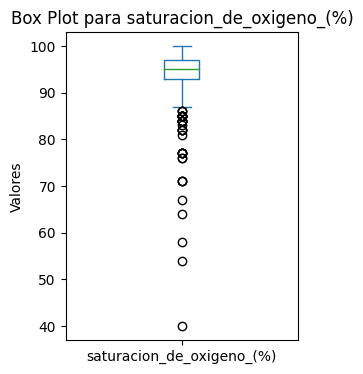

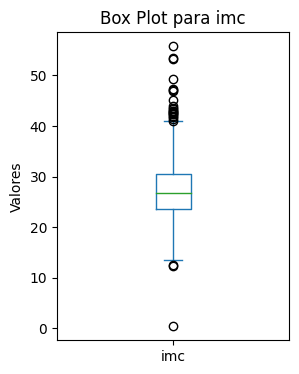

In [28]:
# Gráficos de BOX-PLOT para algunas variables numéricas (Con datos atipicos)

df_filtrado['perimetro_muslo'].plot.box(figsize=(3, 4))
plt.title('Box Plot para Perímetro del Muslo')
plt.ylabel('Valores')
plt.show()

df_filtrado['lipoproteina' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para lipoproteina')
plt.ylabel('Valores')
plt.show()

df_filtrado['creatinina_1_consulta' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para creatinina_1_consulta')
plt.ylabel('Valores')
plt.show()

df_filtrado['hormona_estimulante_de_la_tiroides_(tsh)' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para tsh')
plt.ylabel('Valores')
plt.show()

df_filtrado['tiempo_en_segundos_(apoyo_monopodal)' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para tiempo_en_segundos_apoyo_monopodal')
plt.ylabel('Valores')
plt.show()

df_filtrado['colesterol_total' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para colesterol_total')
plt.ylabel('Valores')
plt.show()

df_filtrado['tasa_de_filtracion_glomerular_tfg2' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para tasa_de_filtracion_glomerular_tfg2')
plt.ylabel('Valores')
plt.show()

df_filtrado['meses_de_diferencia_entre_tfg' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para meses_de_diferencia_entre_tfg')
plt.ylabel('Valores')
plt.show()

df_filtrado['cambio_de_tfg' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para cambio_de_tfg')
plt.ylabel('Valores')
plt.show()


df_filtrado['saturacion_de_oxigeno_(%)' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para saturacion_de_oxigeno_(%)')
plt.ylabel('Valores')
plt.show()

df_filtrado['imc' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para imc')
plt.ylabel('Valores')
plt.show()

Se ha tomado la decisión de eliminar los valores atípicos de las siguientes variables, ya que podrían introducir ruido en el modelo y afectar la calidad de los resultados. La eliminación de estos valores atípicos contribuirá a un análisis más robusto y preciso.

In [25]:
# Eliminar datos atipicos
df_filtrado = df_filtrado[df_filtrado['perimetro_muslo'] < 5000]
df_filtrado = df_filtrado[df_filtrado['lipoproteina'] < 6000]
df_filtrado = df_filtrado[df_filtrado['creatinina_1_consulta'] < 15]
df_filtrado = df_filtrado[df_filtrado['hormona_estimulante_de_la_tiroides_(tsh)'] < 40]
df_filtrado = df_filtrado[df_filtrado['tiempo_en_segundos_(apoyo_monopodal)'] < 80]
df_filtrado = df_filtrado[df_filtrado['colesterol_total'] < 1300]
df_filtrado = df_filtrado[df_filtrado['tasa_de_filtracion_glomerular_tfg2'] < 500]
df_filtrado = df_filtrado[df_filtrado['meses_de_diferencia_entre_tfg'] < 50]
df_filtrado = df_filtrado[df_filtrado['cambio_de_tfg'] < 100]

df_filtrado = df_filtrado[df_filtrado['saturacion_de_oxigeno_(%)'] > 1]
df_filtrado = df_filtrado[df_filtrado['imc'] < 150000]

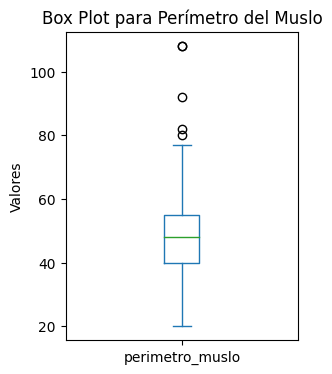

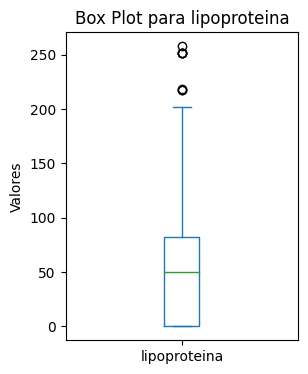

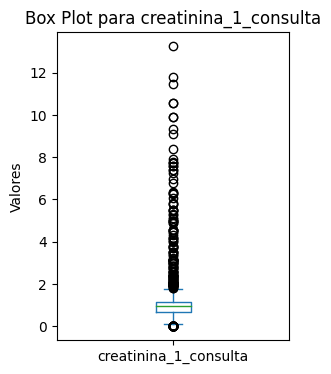

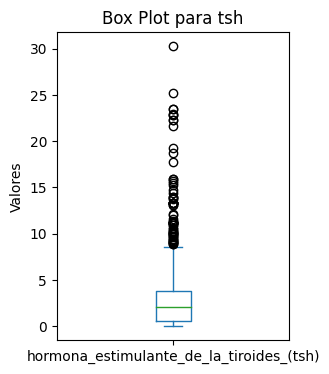

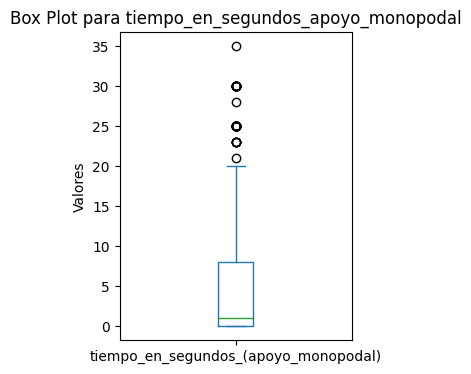

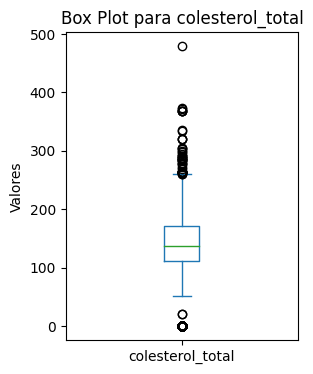

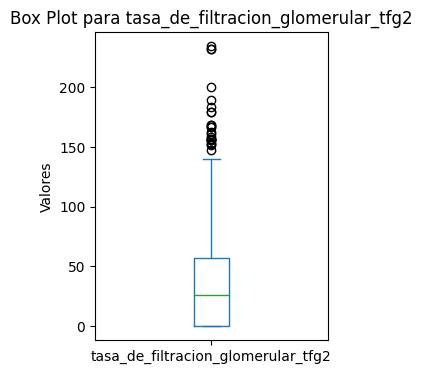

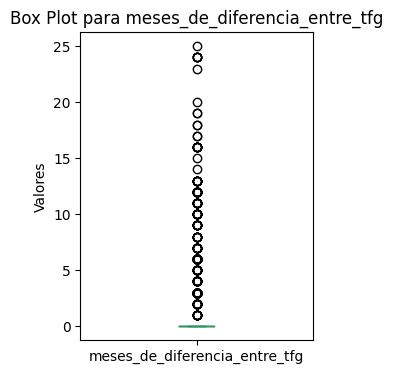

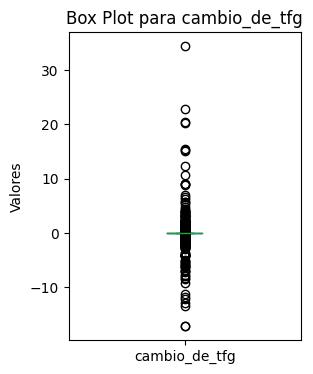

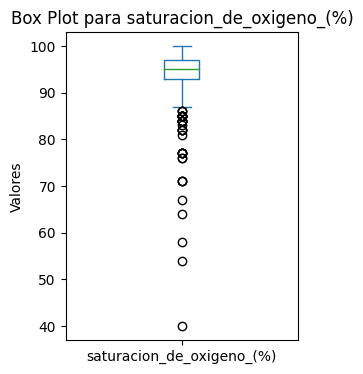

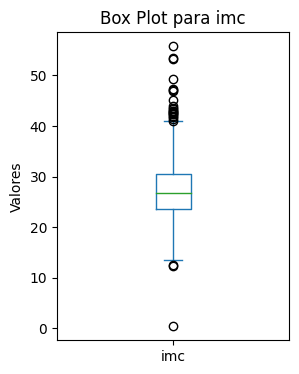

In [26]:
# Gráficos de BOX-PLOT para algunas variables numéricas sin datos atipicos

df_filtrado['perimetro_muslo'].plot.box(figsize=(3, 4))
plt.title('Box Plot para Perímetro del Muslo')
plt.ylabel('Valores')
plt.show()

df_filtrado['lipoproteina' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para lipoproteina')
plt.ylabel('Valores')
plt.show()

df_filtrado['creatinina_1_consulta' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para creatinina_1_consulta')
plt.ylabel('Valores')
plt.show()

df_filtrado['hormona_estimulante_de_la_tiroides_(tsh)' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para tsh')
plt.ylabel('Valores')
plt.show()

df_filtrado['tiempo_en_segundos_(apoyo_monopodal)' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para tiempo_en_segundos_apoyo_monopodal')
plt.ylabel('Valores')
plt.show()

df_filtrado['colesterol_total' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para colesterol_total')
plt.ylabel('Valores')
plt.show()

df_filtrado['tasa_de_filtracion_glomerular_tfg2' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para tasa_de_filtracion_glomerular_tfg2')
plt.ylabel('Valores')
plt.show()

df_filtrado['meses_de_diferencia_entre_tfg' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para meses_de_diferencia_entre_tfg')
plt.ylabel('Valores')
plt.show()

df_filtrado['cambio_de_tfg' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para cambio_de_tfg')
plt.ylabel('Valores')
plt.show()


df_filtrado['saturacion_de_oxigeno_(%)' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para saturacion_de_oxigeno_(%)')
plt.ylabel('Valores')
plt.show()

df_filtrado['imc' ].plot.box(figsize=(3, 4))
plt.title('Box Plot para imc')
plt.ylabel('Valores')
plt.show()